In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = yf.download('^NSEI', start='2018-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
def strategy(df, sma1, sma2):
    df = df.copy()
    df['ret'] = np.log(df.Close.pct_change() + 1) 
    df['SMA1'] = df.Close.rolling(sma1).mean()
    df['SMA2'] = df.Close.rolling(sma2).mean()
    df = df.dropna()  ##sma columns woulds have got NaN value 
    df['position'] = np.where(df['SMA1'] > df['SMA2'], 1, 0)
    df['stratret'] = df['position'].shift(1) * df['ret'] ## because we can buy tomorrow
    df.dropna() ##since shift would have created NaN value
    return df

In [4]:
def performance(df):
    return np.exp(df[['ret', 'stratret']].sum())

In [5]:
performance(strategy(df,20,50))

ret         1.710251
stratret    2.197139
dtype: float64

In [6]:
stratdf = strategy(df,20, 50)

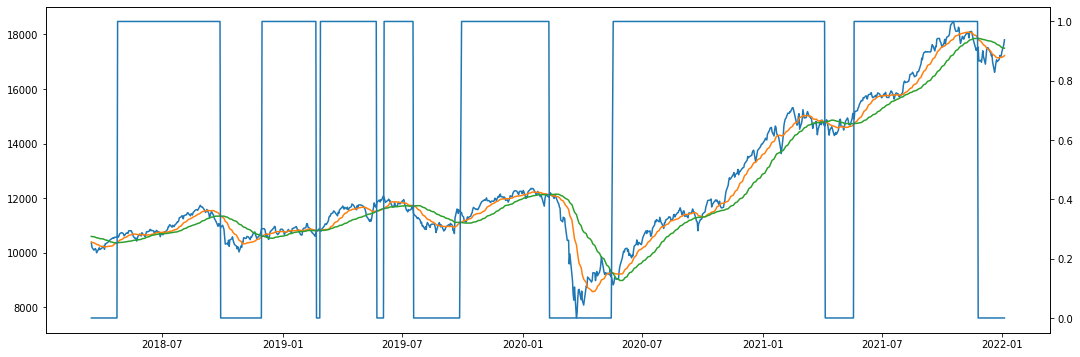

In [8]:
fig, ax = plt.subplots(figsize=(18,6))
ax2 = ax.twinx()
ax.plot(stratdf[['Close', 'SMA1', 'SMA2']])
ax2.plot(stratdf['position'])